# Análise de procedimentos hospitalares do SUS: valor total por Unidade Federativa

## Primeiros passos

Neste documento, será feita uma análise do custo total de procedimentos hospitalares, separados por Estado e medidos mensalmente.
O primeiro passo é importar as bibliotecas necessárias.

In [1]:
import pandas as pd # Manipulação de tratamento de dados
import matplotlib.pyplot as plt # Plotagem de gráficos
import matplotlib.ticker as ticker # Formatação de dados de gráficos

A segunda etapa é realizar a leitura dos dados. Neste caso, usamos o dataset 'A192613189_28_143_208.csv', disponível no <a href='http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def'>Datasus</a>.

In [2]:
dados = pd.read_csv('A192613189_28_143_208.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12, engine='python', thousands='.', decimal=',')
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,...,1.182469e+07,1.173331e+07,1.020199e+07,7.955139e+06,9.357946e+06,8.880837e+06,9.266015e+06,7.730597e+06,1.102331e+07,9.964113e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,...,3.915193e+06,3.640143e+06,3.391242e+06,4.044321e+06,3.276590e+06,3.696997e+06,3.715723e+06,3.538428e+06,4.077046e+06,4.500485e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,...,1.976946e+07,1.805993e+07,1.784102e+07,1.640832e+07,1.989562e+07,1.776517e+07,2.143029e+07,2.591713e+07,2.203218e+07,1.917248e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,...,3.015488e+06,2.826486e+06,2.928044e+06,3.090314e+06,3.621031e+06,3.454461e+06,3.266928e+06,3.519774e+06,3.985530e+06,3.288770e+08
4,15 Pará,18864744.11,1.955376e+07,2.193734e+07,2.084283e+07,2.324995e+07,2.324069e+07,2.400222e+07,2.334122e+07,2.517226e+07,...,4.080413e+07,4.438572e+07,3.682025e+07,3.696593e+07,3.900432e+07,3.801515e+07,3.835468e+07,3.768831e+07,3.327639e+07,4.705309e+09
5,16 Amapá,1120973.34,1.268740e+06,9.746512e+05,1.141137e+06,8.663462e+05,1.440979e+06,1.426659e+06,1.475551e+06,1.651341e+06,...,3.253399e+06,2.946398e+06,2.416019e+06,2.203732e+06,2.218532e+06,2.566920e+06,2.802886e+06,2.817849e+06,3.188211e+06,3.098601e+08
6,17 Tocantins,3441592.69,4.985689e+06,6.205613e+06,4.984482e+06,5.511002e+06,4.927934e+06,5.445602e+06,5.413710e+06,5.596670e+06,...,9.155572e+06,8.390268e+06,8.729632e+06,7.770886e+06,5.278405e+05,6.752771e+05,4.195535e+05,3.191609e+05,1.357751e+06,1.020028e+09
7,21 Maranhão,10723506.39,1.355968e+07,1.398514e+07,1.480942e+07,1.450573e+07,1.490809e+07,1.578490e+07,1.519531e+07,1.495128e+07,...,3.547349e+07,3.221904e+07,3.007715e+07,3.320078e+07,3.194267e+07,3.078340e+07,3.073875e+07,3.092448e+07,3.966368e+07,3.871069e+09
8,22 Piauí,7985142.43,1.007993e+07,1.029837e+07,1.077598e+07,1.039836e+07,1.052825e+07,1.104011e+07,1.054918e+07,1.089920e+07,...,1.990857e+07,2.566354e+07,2.023078e+07,2.238922e+07,1.891160e+07,2.088397e+07,2.268939e+07,1.940027e+07,2.001833e+07,2.280889e+09
9,23 Ceará,15539821.90,2.573510e+07,2.872463e+07,3.067646e+07,3.060445e+07,3.127240e+07,3.092539e+07,2.785144e+07,3.036272e+07,...,5.601951e+07,6.171949e+07,5.662592e+07,5.907460e+07,5.691650e+07,5.084935e+07,5.207822e+07,5.317125e+07,6.207962e+07,6.591837e+09


Como é possível verificar acima, os números estão sendo apresentados em notação científica. Para melhorar a legibilidade dos mesmos, vamos formatar globalmente o Pandas para formatar números de ponto flutuante com precisão de duas casas decimais.

In [3]:
pd.options.display.float_format = "{:.2f}".format

E agora nos certificamos que a formação está correta!

In [4]:
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,996411254.68
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,450048530.47
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1917247936.05
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,328876965.09
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4705309002.29
5,16 Amapá,1120973.34,1268740.33,974651.24,1141137.32,866346.18,1440978.95,1426659.48,1475551.38,1651341.43,...,3253399.45,2946398.44,2416019.23,2203732.04,2218532.26,2566919.60,2802886.34,2817849.31,3188210.98,309860092.59
6,17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,...,9155572.36,8390267.72,8729632.49,7770885.66,527840.46,675277.05,419553.49,319160.87,1357751.33,1020028272.64
7,21 Maranhão,10723506.39,13559679.41,13985142.36,14809416.46,14505727.38,14908091.32,15784899.40,15195312.89,14951277.75,...,35473489.49,32219037.29,30077152.72,33200778.47,31942670.33,30783403.58,30738750.31,30924484.99,39663677.48,3871069498.04
8,22 Piauí,7985142.43,10079928.25,10298372.45,10775976.33,10398360.88,10528253.88,11040107.92,10549176.40,10899198.97,...,19908573.27,25663537.49,20230782.72,22389215.72,18911604.50,20883972.79,22689390.32,19400269.01,20018325.75,2280888802.74
9,23 Ceará,15539821.90,25735101.55,28724625.75,30676457.06,30604453.47,31272395.18,30925391.36,27851438.72,30362719.90,...,56019506.33,61719491.69,56625919.77,59074596.33,56916499.66,50849353.22,52078218.88,53171253.41,62079618.54,6591836650.18


Apenas para testes, podemos verificar a média total do dataset.

In [5]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

## Iniciando com gráficos

A partir daqui vamos começar a plotar alguns gráficos. Este primeiro mostrará os dados referentes a Agosto de 2008, somente informando os eixos X e Y.

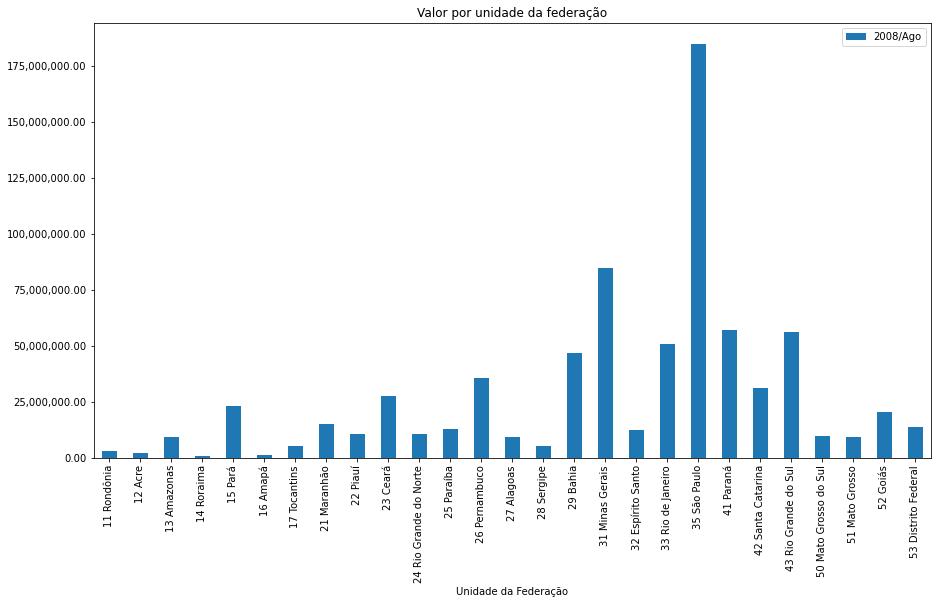

In [6]:
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Valor por unidade da federação')
plt.show()

É possível melhorar a exibição deste gráfico, começando por ordenar os valores e apresenta-los na horizontal, exibindo valores por milhão de reais.

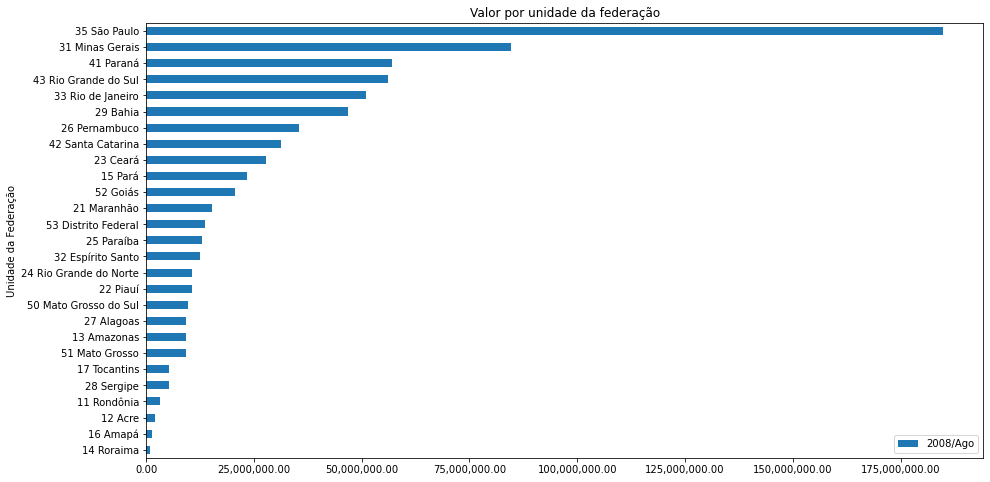

In [7]:

dados_ordenados = dados.sort_values(by='2008/Ago', ascending=False)
ax = dados_ordenados.plot(x='Unidade da Federação', y='2008/Ago', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor por unidade da federação')
plt.show()

## Desafios

### 1 - Escolher um título mais descritivo

Para cumprir o primeiro desafio, segue o mesmo gráfico, porém com um título mais descritivo e o eixo X (valores) divido por um milhão, para facilitar a legibilidade.

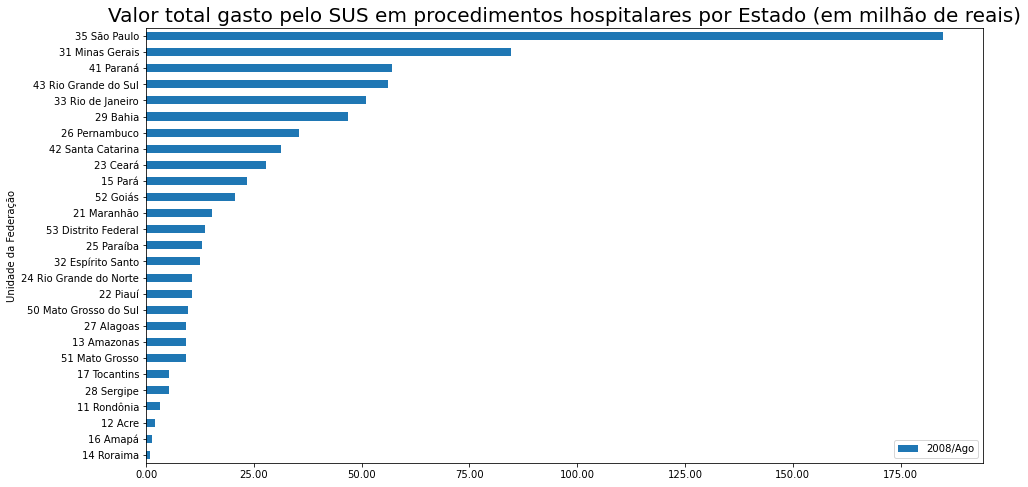

In [8]:
dados_ordenados['2008/Ago'] /= 1000000
ax = dados_ordenados.plot(x='Unidade da Federação', y='2008/Ago', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)', fontsize=20)
plt.show()

### 2 - Mesma análise da aula, porém com o mês mais recente

Para cumprir o segundo desafio, precisaremos saber qual o mês mais recente disponível no dataset. Como os meses estão distribuídos em colunas, podemos realizar uma consulta no dataset para retornar, por exemplo, as últimas três colunas disponíveis.

In [9]:
dados[dados.columns[-3:]].head()

,2021/Fev,2021/Mar,Total
0,7730597.04,11023309.47,996411254.68
1,3538427.92,4077045.92,450048530.47
2,25917134.55,22032176.22,1917247936.05
3,3519773.73,3985530.08,328876965.09
4,37688314.23,33276392.89,4705309002.29


Dado o resultado acima, verificamos que o mês mais recente disponível para análise é Março de 2021. Então vamos replicar o gráfico feito anteriormente, atualizando o mês e ano. Existe uma linha na coluna referente ao mês de março que contém um hífen no lugar de um valor numérico. Para evitar erros durante a execução do código, vamos substituir esta ocorrência por um zero e, em seguida, plotar o gráfico.

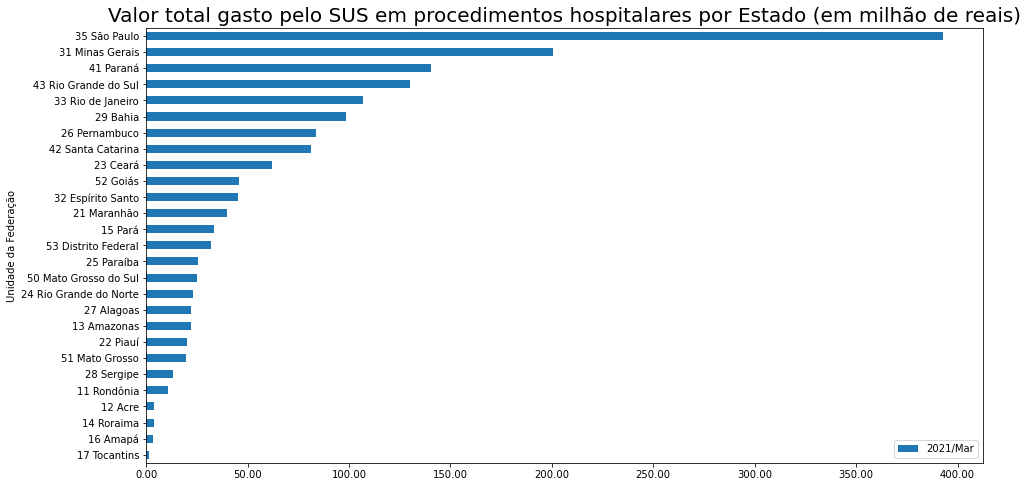

In [10]:
#dados['2021/Mar'] = dados['2021/Mar'].str.replace(r'-', '0').astype(float)
dados_mais_recentes = dados.sort_values(by='2021/Mar', ascending=False)
dados_mais_recentes['2021/Mar'] /= 1000000
ax = dados_mais_recentes.plot(x='Unidade da Federação', y='2021/Mar', kind='barh', figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title(label = 'Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)', fontsize=20)
plt.show()